In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
root = 'project/wyin/jlee/ml-project'
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
data_loc = '/project/wyin/jlee/ml-project/dos-prediction-full/data'
k_data_loc = '/project/wyin/jlee/ml-project/data-collection/full-dataset/data'

In [11]:
train_set = np.load(os.path.join(data_loc, 'train-set.npz'))
train_params = train_set['params']
train_dos = train_set['dos']

val_set = np.load(os.path.join(data_loc, 'val-set.npz'))
val_params = val_set['params']
val_dos = val_set['dos']

test_set = np.load(os.path.join(data_loc, 'test-set.npz'))
test_params = test_set['params']
test_dos = test_set['dos']

In [56]:
def min_max(param_arr):
    count = 0
    mx = 6
    mn = -6
    for t1, t2, j in param_arr:
        if t1 < 0 and t2 > 0:
            k_dat = np.loadtxt(os.path.join(k_data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'disp_10-01.dat'))
            e_m = k_dat[32, 1]
            
            mx = max(mx, 6 - e_m)
            mn = min(mn, -6 - e_m)
            
    print(f'{mn}, {mx}')

In [57]:
min_max(train_params)

-6, 9.74812


In [61]:
def min_max(param_arr):
    count = 0
    mx = -1e6
    mn = 1e6
    for t1, t2, j in param_arr:
        if t1 < 0 and t2 > 0:
            k_dat = np.loadtxt(os.path.join(k_data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'disp_10-01.dat'))
            e_m = k_dat[32, 1]
            
            mx = max(mx, np.round(e_m, 2))
            mn = min(mn, np.round(e_m, 2))
            
    print(f'{mn}, {mx}')
    
min_max(train_params)
min_max(val_params)
min_max(test_params)

-3.75, -1.66
-3.66, -1.71
-3.7, -1.69


In [63]:
print(-6 + 1.66)
print(6 + 3.75)

-4.34
9.75


In [60]:
data_loc = '/project/wyin/jlee/ml-project/data-collection/full-dataset/data'

dos_dat = np.loadtxt(os.path.join(data_loc, 'param_-0.32_0.20_0.296', 'dos.dat'))
k_dat = np.loadtxt(os.path.join(data_loc, 'param_-0.48_0.20_0.296', 'disp_10-01.dat'))

print(k_dat[32])
e_m = k_dat[32, 1]
print(e_m)
print(k_dat)
print(dos_dat[,0])

[ 0.5     -3.11391  0.3053   0.02293 -0.8     -0.8    ]
-3.11391
[[ 0.      -2.42876  0.02065  0.98036  2.72     2.72   ]
 [ 0.01562 -2.4148   0.05908  1.30139  2.71153  2.71153]
 [ 0.03125 -2.45232  0.03791  0.83233  2.68618  2.68618]
 [ 0.04688 -2.43683  0.02943  1.00896  2.64421  2.64421]
 [ 0.0625  -2.4283   0.0196   1.00304  2.58603  2.58603]
 [ 0.07812 -2.46543  0.03992  0.85342  2.51218  2.51218]
 [ 0.09375 -2.46484  0.07407  0.79218  2.42339  2.42339]
 [ 0.10938 -2.4803   0.2016   0.91013  2.3205   2.3205 ]
 [ 0.125   -2.49739  0.04785  0.64178  2.20451  2.20451]
 [ 0.14062 -2.51032  0.03997  0.5089   2.07653  2.07653]
 [ 0.15625 -2.52048  0.07397  0.61148  1.9378   1.9378 ]
 [ 0.17188 -2.5437   0.0541   0.48289  1.78966  1.78966]
 [ 0.1875  -2.55784  0.04963  0.39773  1.63352  1.63352]
 [ 0.20312 -2.57341  0.05875  0.45884  1.4709   1.4709 ]
 [ 0.21875 -2.60572  0.10889  0.41644  1.30336  1.30336]
 [ 0.23438 -2.62043  0.07012  0.31371  1.13251  1.13251]
 [ 0.25    -2.67231  0.

In [15]:
print(dos_dat[0])
print(dos_dat[-1])

[-6.00e+00  1.15e-03]
[6.00e+00 1.24e-03]


Text(0.5, 1.0, 'Shifted dos')

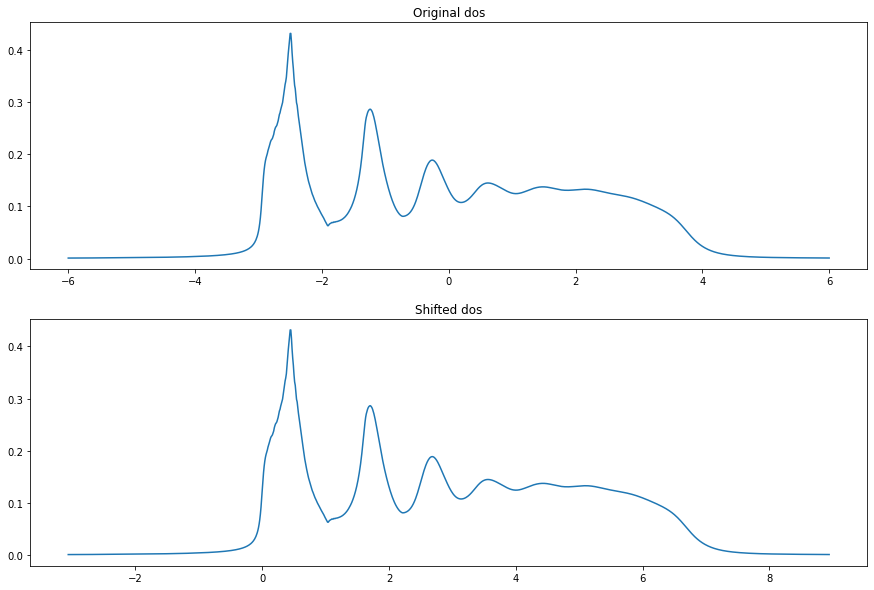

In [5]:
fig, ax = plt.subplots(2, figsize = (15, 10))
ax[0].plot(dos_dat[:,0], dos_dat[:,1])
ax[0].set_title("Original dos")

shifted_w = dos_dat[:,0] - e_m
ax[1].plot(shifted_w, dos_dat[:,1])
ax[1].set_title("Shifted dos")